<a href="https://colab.research.google.com/github/mfmachado/adar/blob/main/ICT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ICT @ BrainAGE

Com o envelhecimento ocorrem várias alterações no corpo humano, nomeadamente no cérebro onde o volume de massa cinzenta diminiu, a massa branca aumenta até à idade de 50 anos diminuindo posteriormente e o liquido cefeloraquidiano (CSF) aumenta com a idade. A modulação do envelhecimento saudável do cérebro poderá abrir portas para perceber algumas patolofias como alzheimer, Parkinson etc que actualmente não têm cura. 

**A questão que se impõe é como é que podemos modular o envelhecimento utilizando dados?** Neste tutorial irão perceber como é que ocorre o ajuste de uma recta a dados.


In [119]:
#@title
## Data
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import ipywidgets as widgets
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


random.seed(2022)

def generate_data_without_noise(m, b, number_points):
  
    x = np.linspace(10, 80, number_points)
    y = x*m + b
    return pd.DataFrame(np.vstack([x, y]).T, columns=["x", "y"])

def generate_data_with_noise(m, b, number_points):
    
    x = np.linspace(10, 80, number_points)
    y = x*m + b + np.random.normal(0, 0.5, number_points)
    return pd.DataFrame(np.vstack([x, y]).T, columns=["x", "y"])

def data_generation():
    
    number_points = 200
    age = np.linspace(10, 80, number_points)
    csf = 0.0005*age**2 + np.random.normal(0.5, 0.2, number_points)
    return pd.DataFrame(np.vstack([age, csf]).T, 
                        columns=["age", "csf"]).sample(frac=1)

n_points = 71
m, b = round(random.random()/5, 2), round(random.random()/5, 2)
df_data = generate_data_without_noise(m, b, n_points)
  
m_noise, b_noise = round(random.random()/10, 2), round(random.random()/10, 2)
df_data_noise = generate_data_with_noise(m_noise, b_noise, n_points)


## Regressão Linear

A regressão linear descreve a relação entre uma variável dependente, $y$, e uma variável independente, $x$, pela equação: $y = mx +b$. Onde $m$ corresponde ao declive e $b$ a ordenada na origem $b$.

No gráfico abaixo, Figura 1, está uma recta que segue a equação:
$y=2x+5$ 


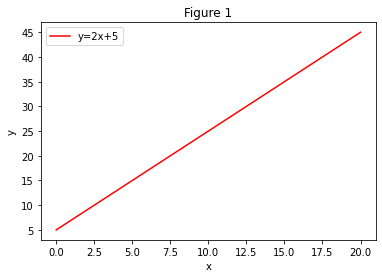

In [120]:
#@title

plt.plot([0, 20], [5, 45], 'r', label=f"y=2x+5")
_ = plt.xlabel("x")
_ = plt.ylabel("y")
_ = plt.legend()
_ = plt.title("Figure 1")

### Exercício 1: Conseguem encontrar os parametros da recta ($m$ e $b$) através de dados?

Usando os dados que se encontram na tabela abaixo, tentem encontrar ($m$ e $b$). Preencham a vossa solução no widget abaixo e verifiquem se está correcta.

Nota: Para encontrar ($m$ e $b$) podem usar um sistema de equações.

In [121]:
#@title
n_points = 71

df_data.head(5)

,x,y
0,10.0,1.19
1,11.0,1.30
2,12.0,1.41
3,13.0,1.52
4,14.0,1.63


In [122]:
#@title
def verify_slop_intercep(df, x_label, y_label, m_estimate, b_estimate, m_real, b_real):
  if m_estimate==m_real and b_estimate==b_real:
    print(f"\nCorrect, the m is {m_real} and b is {b_real}\n")
  else:
    print(f"\nWrong, give it another try!\n")
  
  sns.scatterplot(data=df, x=x_label,y=y_label, label="data")
  plt.plot(df[x_label], m_estimate*df[x_label]+b_estimate, 'r', label=f"y={m_estimate}x+{b_estimate}")
  plt.legend()
  plt.title("Figure 2")
  return m_estimate==m_real and b_estimate==b_real
m_widget = widgets.FloatText(value=0, description='m', disabled=False)
b_widget = widgets.FloatText(value=0, description='b', disabled=False)
result = interact(verify_slop_intercep, 
            df=widgets.fixed(df_data),
            x_label=widgets.fixed("x"),
            y_label=widgets.fixed("y"),
            m_estimate=m_widget, b_estimate=b_widget, 
            m_real=widgets.fixed(m), b_real=widgets.fixed(b))

interactive(children=(FloatText(value=0.0, description='m'), FloatText(value=0.0, description='b'), Output()),…

## Variabilidade dos dados

O dados adquiridos em problemas reais contêm variabidade. Essa variabilidade tem diferentes origens, no caso do cérebro, por exemplo, o cérebro de cada pessoa é diferente. 

Na Figure 3, está representado um caso mais realista, acham que neste caso é possível determinar $m$ e $b$ usando um sistema de equações?

A resposta é não, pois cada pair de pontos dará uma equação diferente! Explorem o widget abaixo.

In [123]:
#@title

def verify_slop_intercep(df, x_label, y_label, m_estimate, b_estimate):
  
  sns.scatterplot(data=df, x=x_label,y=y_label, label="data")
  plt.plot(df[x_label], m_estimate*df[x_label]+b_estimate, 'r', label=f"y={m_estimate}x+{b_estimate}")
  plt.legend()
  plt.title("Figure 3")
  return 


m_value = 0.3

b_value = -2.9

step_m = 0.005
step_b = 0.1
nsteps = 15

min_m_value = m_noise - nsteps*step_m
max_m_value = max(m_noise + 5*step_m, m_value)
min_b_value = min(b_value, b_noise - nsteps*step_b)
max_b_value = b_noise + 5*step_b

m_widget = widgets.FloatSlider(value=m_value, 
                               min=min_m_value, 
                               max=max_m_value, 
                               step=step_m,
                               description='m', disabled=False)

b_widget = widgets.FloatSlider(value=b_value, 
                               min=min_b_value, 
                               max=max_b_value, 
                               step=step_b,
                               description='b', disabled=False)

_= interact(verify_slop_intercep, 
            df=widgets.fixed(df_data_noise),
            x_label=widgets.fixed("x"),
            y_label=widgets.fixed("y"),
            m_estimate=m_widget, b_estimate=b_widget)

interactive(children=(FloatSlider(value=0.3, description='m', max=0.3, min=-0.045, step=0.005), FloatSlider(va…

## Optimização dos paramêtros da recta

Como podemos então decidir qual o melhor $m$ e $b$? 

Em suma, é necessário uma métrica que nos permita avaliar o ajuste da recta aos dados. Existem diferentes métricas, uma das métricas que é usada é a Soma do Quadrado dos Erros (MSE - Mean Squared Error), que é dada pela equação abaixo.

\begin{align}
    MSE = \frac{1}{N}\sum_{i=1}^N(y - \hat{y})^2 
\end{align}

onde $N$ é o número de instâncias, $y$ e $\hat{y}$ é o valor real e estimado de y, respectivamente.

O objectivo é minimizar o MSE, ou seja:
\begin{align}
\min _{m, b} \frac{1}{N}\sum_{i=1}^{N}\left(y_{i}-\hat{y}_i\right)^{2}
\end{align}

### Exercicío 2: Encontra os paramêtros da recta com menor valore de MSE.

Explora o widget abaixo e encontra o valor de $m$ e $b$ cujo erro é mais baixo.

In [124]:
#@title
from sklearn.metrics import mean_squared_error
values_mse = []
def verify_slop_intercep(df, x_label, y_label, m_estimate, b_estimate, m_real, b_real):
  
  f, ax = plt.subplots(1, 2, figsize=(15, 5))
  sns.scatterplot(data=df, x=x_label,y=y_label, label="data", ax=ax[0])
  y_pred = m_estimate*df[x_label]+b_estimate
  ax[0].plot(df[x_label], y_pred, 'r', 
             label=f"y={m_estimate}x+{b_estimate}")
  mse = mean_squared_error(df[y_label], y_pred)
  
  ymin = np.minimum(df[y_label], y_pred)
  ymax = np.maximum(df[y_label], y_pred)
  ax[0].vlines(df[x_label], ymin, ymax, 'g', alpha=0.5, label='Resíduos')

  values_mse.append(mse)

  ax[1].plot(values_mse)
  ax[1].set_ylabel("MSE")
  ax[1].set_xlabel("iteration")
  ax[1].set_title("Error Evolution")
  ax[0].legend()
  if m_estimate == m_real and b_estimate == b_real:
    print("Congratulations you found the real m and b value!")
    ax[1].plot([len(values_mse)-1], [values_mse[-1]], 'ro')
  return 


m_widget = widgets.FloatSlider(value=m_value, 
                               min=min_m_value, 
                               max=max_m_value, 
                               step=step_m,
                               description='m', disabled=False)

b_widget = widgets.FloatSlider(value=b_value, 
                               min=min_b_value, 
                               max=max_b_value, 
                               step=step_b,
                               description='b', disabled=False)

_= interact(verify_slop_intercep, 
            df=widgets.fixed(df_data_noise),
            x_label=widgets.fixed("x"),
            y_label=widgets.fixed("y"),
            m_estimate=m_widget, b_estimate=b_widget,
            m_real=widgets.fixed(m_noise), b_real=widgets.fixed(b_noise))


interactive(children=(FloatSlider(value=0.3, description='m', max=0.3, min=-0.045, step=0.005), FloatSlider(va…

## Características não lineares

A matéria cinzenta decresce monotonicamente com a idade, no entanto não é o caso de todas as features, como por exemplo o Líquido Cefaloraquidiano (CSF) que erá representado na Figura abaixo. Como fazemos nestes casos? Há várias soluções, uma delas é transformar a característica não linear em linear para que conseguimos, desta forma, aplicar uma recta aos dados, por exemplo aplicando a seguinte equação aos dados:
\begin{align}
    x_{linear} = x_{non~linear}^n
\end{align}



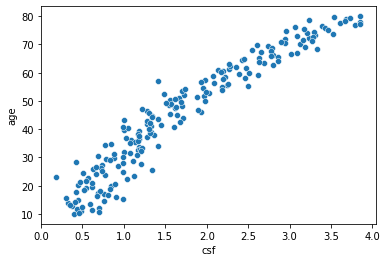

In [125]:
#@title
df = data_generation()
_ = sns.scatterplot(data=df, y="age", x="csf")

### Exercício 3: Qual a transformação polinomial que deve ser aplicada ao líquido cefaloraquidiano, que minimize o MSE?

Terás de descobrir o valor de $n$ da equação: $x_{linear} = x_{non~linear}^n$


Try different orders on the widget below and select the one that have a better fitting to the data.


In [126]:
#@title

def f(order):
    pipeline = LinearRegression()
    pipeline.fit(df[["csf"]]**order, df["age"])   
    predicted_age = pipeline.predict(df[["csf"]]**order)
    
    sns.scatterplot(data=df, x="csf", y="age", label="CSF")
    plt.plot(df["csf"], predicted_age, 'or', label='Model Prediction')
    mae = round(mean_absolute_error(df["age"], predicted_age), 2)
    print(f"\nMSE: {mae} years\n")
    if order == 0.5:
      print("Correct! The order is 0.5.\n")
    return 

widget_csf_order = widgets.FloatText(value=0, description='n', disabled=False)
n = interact(f, order=widget_csf_order)

interactive(children=(FloatText(value=0.0, description='n'), Output()), _dom_classes=('widget-interact',))